In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [3]:
# verificação de dados faltantes

df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

In [4]:
# verificação de tipos de dados nas variáveis

df.dtypes

sex           object
age            int64
famsize       object
Pstatus       object
traveltime     int64
studytime      int64
schoolsup     object
famsup        object
paid          object
activities    object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
absences       int64
G3             int64
dtype: object

In [5]:
import numpy as np
import matplotlib.pyplot as plt

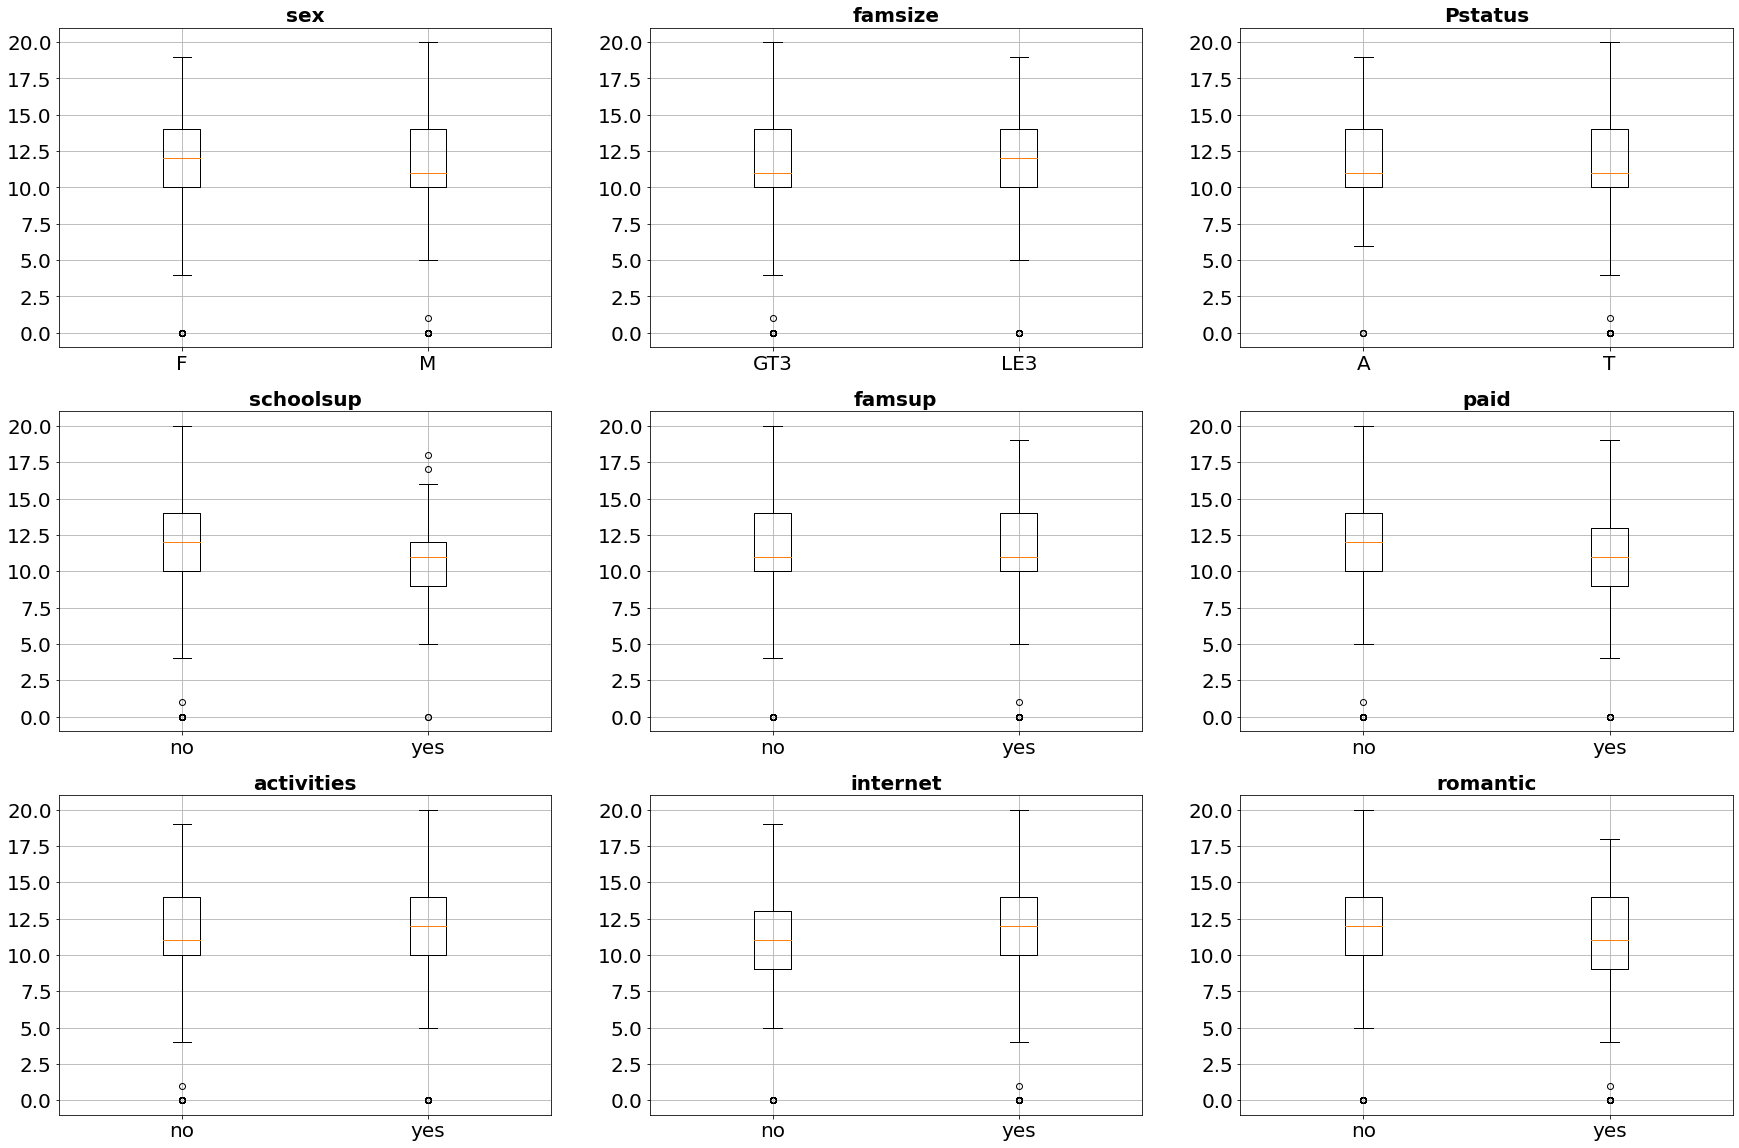

In [6]:
# gerar gráficos do tipo boxplot para entender a distribuição da variável alvo (G3) em relação às variáveis categóricas

colscat = df.dtypes[(df.dtypes == 'object')].index.tolist()

plt.figure(figsize=[30,20])
i=0
for c in colscat:
    i+=1
    plt.subplot(3,3,i)
    grouped=df.groupby(by=c).apply(lambda x: x.G3.values)
    plt.boxplot(grouped.values,labels=grouped.index)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(c,fontsize=20,fontweight='bold')
    plt.grid()
    
plt.show()

De um modo geral, há pouca variação na distribuição da variável G3 ao cruzar com as diferentes categorias isoladamente.

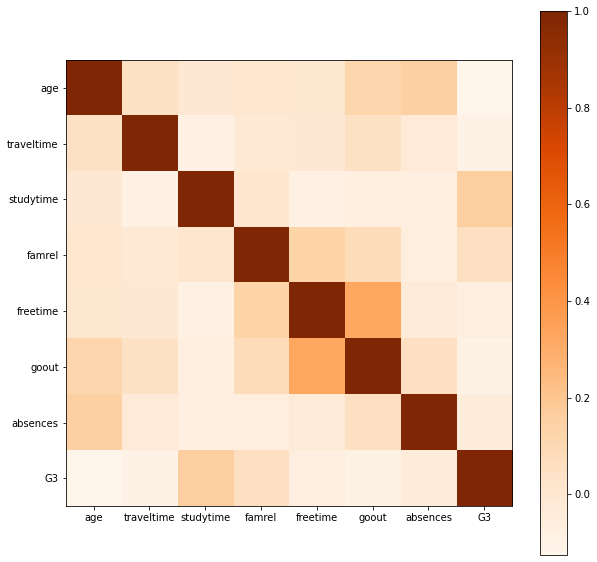

In [7]:
# gerar um gráfico de correlações entre as variáveis quantitativas.

colsnum = df.dtypes[(df.dtypes == 'int64')].index.tolist()
corrs = df[colsnum].corr().values
plt.figure(figsize=[10,10])
plt.imshow(corrs,cmap='Oranges')
plt.yticks(ticks=np.arange(len(colsnum)),labels=colsnum)
plt.xticks(ticks=np.arange(len(colsnum)),labels=colsnum)
plt.colorbar()
plt.show()

Correlações em geral são fracas. 'freetime' e 'goout' tem uma correlação um pouco mais forte entre si, próximo de 0,4.

In [8]:
# correlações entre as diversas variáveis quantitativas e a variável alvo

df.corr()['G3']

age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

No geral as variáveis quantitativas possuem correlações baixas com a variável alvo. A maior delas é 'studytime', de 0.16

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [10]:
# divisão do dataset em treino e teste 

dftrain, dftest = train_test_split(df, test_size=0.25, random_state=0)
print (df.shape)
print(dftrain.shape)
print (dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


In [11]:
if 'G3' in colsnum:
    colsnum.remove('G3')

In [12]:
# definição da função de pré-processamento dos dados

def pre_processamento (df, dataset_de_treino = True, cat_encoder = None, mmsc_scaler = None):
    dff = df.copy()
    
    variaveis_normalizar = colsnum
    variaveis_encodar = colscat
    
    if dataset_de_treino: # no dataset de treino, o modelo será treinado antes de transformar os dados
        
        encoder = OneHotEncoder() # OHE para as variáveis categóricas
        variaveis_ohe = encoder.fit_transform(dff[variaveis_encodar]).toarray()
        
        mmsc = MinMaxScaler() # adotamos o MinMaxScaler para as variáveis numéricas discretas.
        variaveis_norm = mmsc.fit_transform(dff[variaveis_normalizar])
        
        X, y = np.c_[variaveis_ohe, variaveis_norm], dff.G3.values
        return X, y, encoder, mmsc
    
    else: # no dataset de teste, os dados serão transformados a partir do modelo já treinado 
        variaveis_ohe = cat_encoder.transform(dff[variaveis_encodar]).toarray()
        
        variaveis_norm = mmsc_scaler.transform(dff[variaveis_normalizar])
        
        X, y = np.c_[variaveis_ohe, variaveis_norm], dff.G3.values
        return X, y
    

In [13]:
# pre-processamento dos dados de treino
Xtrain, ytrain, encoder_train, scaler_train = pre_processamento(dftrain, dataset_de_treino = True,
                                                                cat_encoder = None, mmsc_scaler = None)

In [14]:
# pré-processamentos dos dados de teste
Xtest, ytest = pre_processamento(dftest, dataset_de_treino = False,
                                cat_encoder = encoder_train, mmsc_scaler = scaler_train)

In [15]:
print (Xtrain.shape,ytrain.shape)
print (Xtest.shape,ytest.shape)

(783, 25) (783,)
(261, 25) (261,)


In [16]:
# importação dos modelos a serem utilizados

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

In [17]:
# treinamento do modelo de Regressão Linear

lin_reg=LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [18]:
# Cálculo do R2 (a métrica de performance adotada) para este modelo

r2_score(y_true = ytrain, y_pred = lin_reg.predict(Xtrain))

0.09285243566652324

In [19]:
# aplicação do modelo KNN e o cálculo do R2 para alguns hiperparâmetros (número de vizinhos)

num_vizinhos = [1, 2, 5, 10, 20, 50]

for i in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true = ytrain, y_pred = knn.predict(Xtrain))
    print ('K=',i,'  ||  R2=',r2_train)

K= 1   ||  R2= 0.9646776318415905
K= 2   ||  R2= 0.5894165435745937
K= 5   ||  R2= 0.31313623298335247
K= 10   ||  R2= 0.19848545251307437
K= 20   ||  R2= 0.14863441604455285
K= 50   ||  R2= 0.07253207688929708


In [20]:
# aplicação do modelo árvore de decisão e o cálculo do R2 para alguns hiperparâmetros (profundidade máxima)

max_profundidades = [1,5,10,100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain,ytrain)
    r2_train = r2_score(y_true = ytrain, y_pred = dt.predict(Xtrain))
    print ('Profundidade árvore:',m,'  ||  R2=',r2_train)

Profundidade árvore: 1   ||  R2= 0.020010927503297027
Profundidade árvore: 5   ||  R2= 0.1996339701767713
Profundidade árvore: 10   ||  R2= 0.6821542413293846
Profundidade árvore: 100   ||  R2= 0.9684286797876163


Há uma grande variação nos resultados de R2 nos modelos, conforme os hiperparâmetros adotados. Possivelmente alguns destes modelos estão sofrendo overfitting.
Vamos avaliar so modelos com a validação cruzada.

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# aplicando o teste de validação cruzada no modelo de Regressão Linear

cv_lin_reg = cross_val_score (estimator = LinearRegression(), X = Xtrain,
                             y = ytrain, cv = 5, scoring = 'r2')

print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.01353099 0.07390081 0.09321104 0.02253619 0.05863816]
media:  0.052363436853265076
desvio padrão:  0.030230385081711043


In [23]:
# vamos definir uma função que recebe os dados do modelo e o dataset e retorna os resultados da avaliação ou
# gera um gráfico com os resultados de R2 do modelo para avaliação.

def cross_val_r2 (modelo, nome_modelo, X, y, folds, grafico):
    
    cv_results = cross_val_score (estimator = modelo, X = Xtrain,
                             y = ytrain, cv = 5, scoring = 'r2')
    modelo.fit(Xtrain,ytrain)
    r2_train = r2_score(y_true = ytrain, y_pred = modelo.predict(Xtrain))
 
    if not grafico:
        return cv_results,r2_train
    
    else:
        
        plt.figure(figsize = [8,6])
        plt.scatter(range(1, 1+folds), cv_results, c = 'blue', s = 100)
        plt.plot(range(1, 1+folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
        plt.xticks(range(1, 1+folds))
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.plot(range(1, 1+folds), [cv_results.mean()] * folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')


        plt.plot(range(1, 1+folds), [cv_results.mean() + cv_results.std()] * folds, '--',
                 c = 'gray', lw = 2, label = '+1 desv. padrão margem')
        plt.plot(range(1, 1+folds), [cv_results.mean() - cv_results.std()] * folds, '--',
                 c = 'gray', lw = 2, label = '-1 desv. padrão margem')

        plt.plot(range(1, 1+folds), [r2_train] * folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
        plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
        plt.ylim([-0.5,1.05])
        plt.grid()
        plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
        plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
        plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
                  fontsize = 14, fontweight = 'bold')
        plt.show()

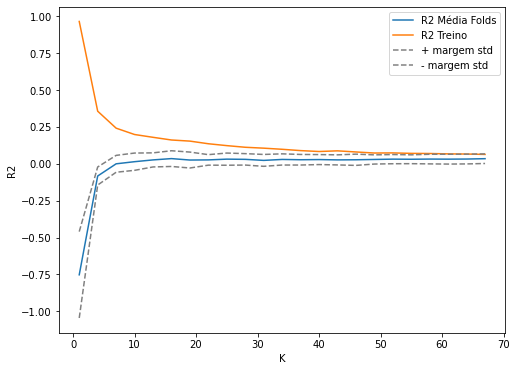

In [24]:
# vamos buscar ter um panorama geral das performances dos modelos variando os hiperparâmetros.
# A idéia é ter uma noção de qual faixa de valores de hiperparâmetros é mais interessante refinar a pesquisa.

resultados_cv, resultados_r2, desvios_cv_pos, desvios_cv_neg = [],[],[],[]

for k in range(1,70,3):
    
    # modelo KNN
    cv, r2 = cross_val_r2 (KNeighborsRegressor(n_neighbors=k),'', Xtrain, ytrain, 5,grafico=False)
    resultados_cv.append(cv.mean())
    resultados_r2.append(r2)
    desvios_cv_pos.append(cv.mean()+cv.std())
    desvios_cv_neg.append(cv.mean()-cv.std())
    
plt.figure(figsize = [8,6])
plt.plot(range(1,70,3),resultados_cv,label='R2 Média Folds')
plt.plot(range(1,70,3),resultados_r2,label='R2 Treino')
plt.plot(range(1,70,3),desvios_cv_pos,'--',label='+ margem std',c='gray')
plt.plot(range(1,70,3),desvios_cv_neg,'--',label='- margem std',c='gray')
plt.xlabel('K')
plt.ylabel('R2')
plt.legend()
plt.show()

O intervalo 10 > K > 60 parece apresentar resultados mais estáveis. Vamos explorar este intervalo mais detalhadamente

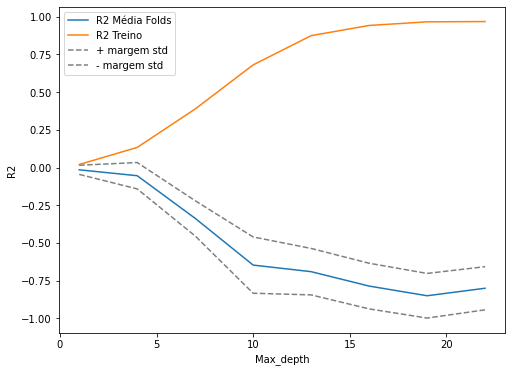

In [25]:
# Agora com o modelo DecTree

resultados_cv, resultados_r2, desvios_cv_pos, desvios_cv_neg = [],[],[],[]

for k in range(1,24,3):
    
    cv, r2 = cross_val_r2 (DecisionTreeRegressor(max_depth=k),'', Xtrain, ytrain, 5, grafico=False)
    resultados_cv.append(cv.mean())
    resultados_r2.append(r2)
    desvios_cv_pos.append(cv.mean()+cv.std())
    desvios_cv_neg.append(cv.mean()-cv.std())
    
plt.figure(figsize = [8,6])
plt.plot(range(1,24,3),resultados_cv,label='R2 Média Folds')
plt.plot(range(1,24,3),resultados_r2,label='R2 Treino')
plt.plot(range(1,24,3),desvios_cv_pos,'--',label='+ margem std',c='gray')
plt.plot(range(1,24,3),desvios_cv_neg,'--',label='- margem std',c='gray')
plt.xlabel('Max_depth')
plt.ylabel('R2')
plt.legend()
plt.show()

No modelo de árvore de decisão, a performance mais equilibrada parece em torno do max_depth=5

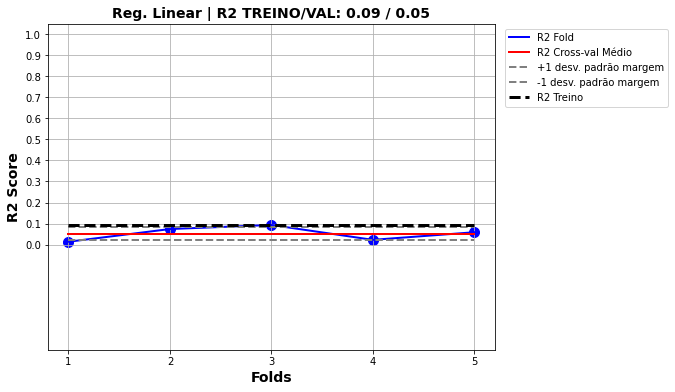

In [26]:
# vamos avaliar o modelo de regressão linear primeiramente

cross_val_r2 (LinearRegression(),'Reg. Linear', Xtrain, ytrain, 5, grafico=True)

O modelo de regressão linear tem uma performance baixa, mas com resultados condizentes  na validação.

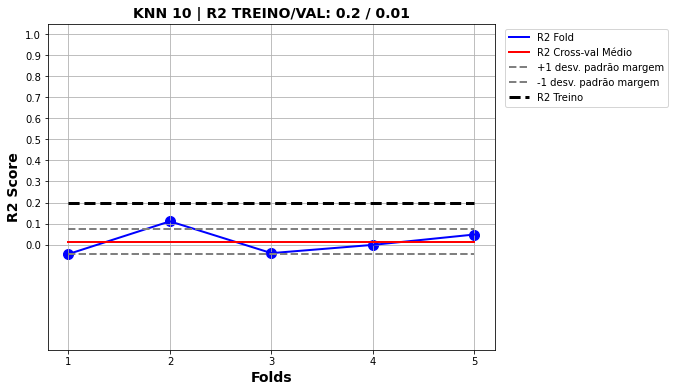

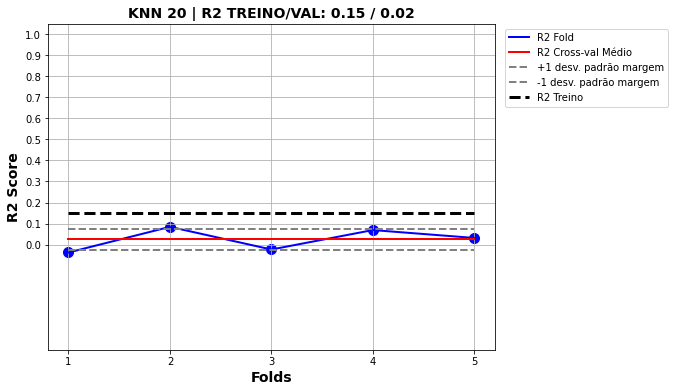

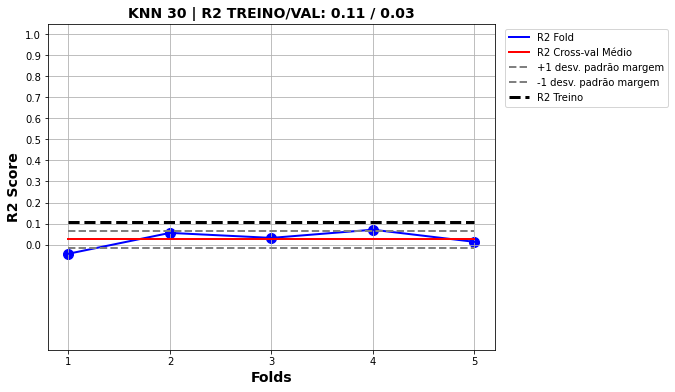

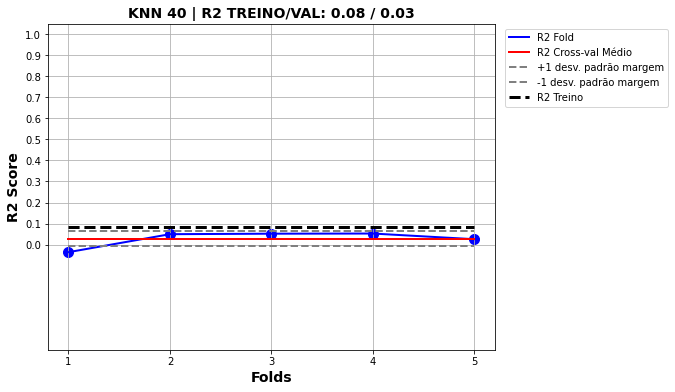

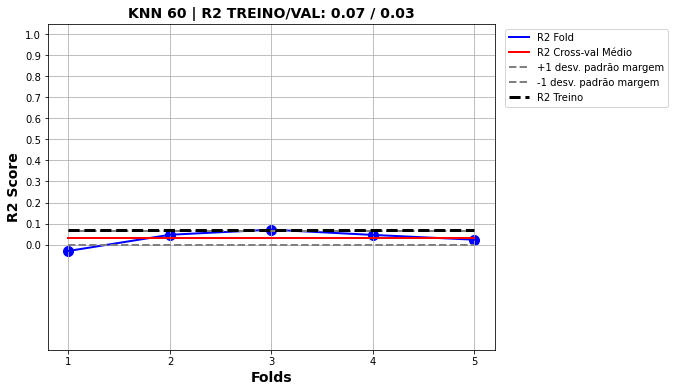

In [27]:
# avaliação dos modelos KNN

num_vizinhos = [10, 20, 30, 40 , 60]

for k in num_vizinhos:

    cross_val_r2 (KNeighborsRegressor(n_neighbors=k),'KNN '+str(k), Xtrain, ytrain, 5, grafico=True)

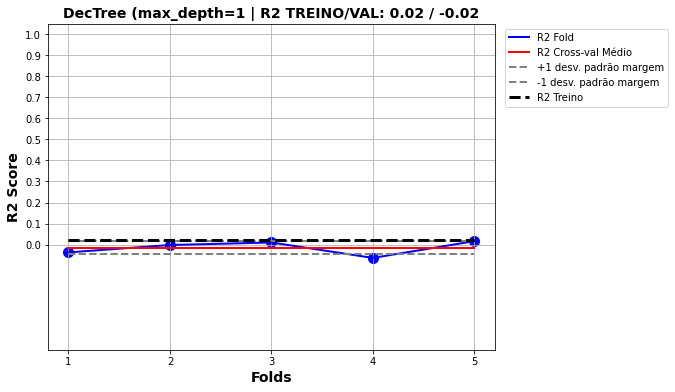

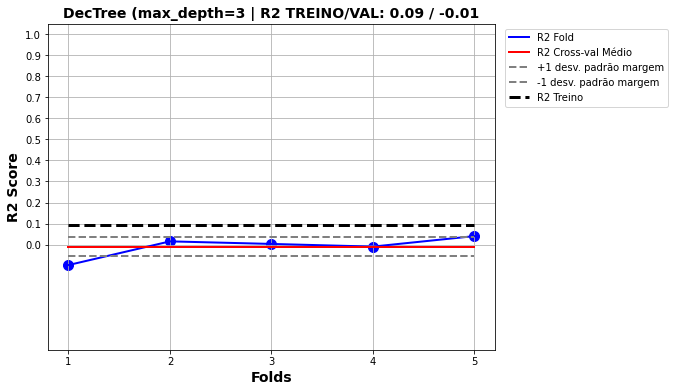

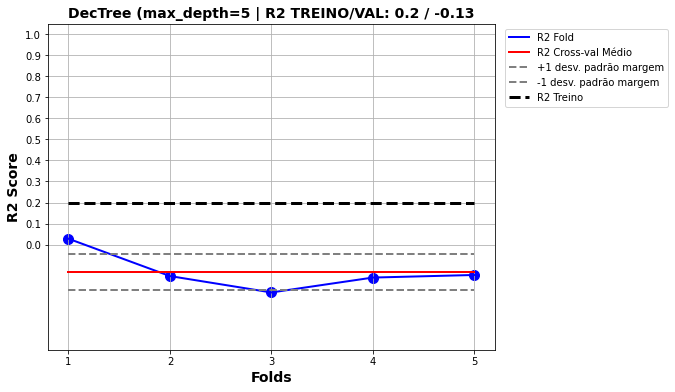

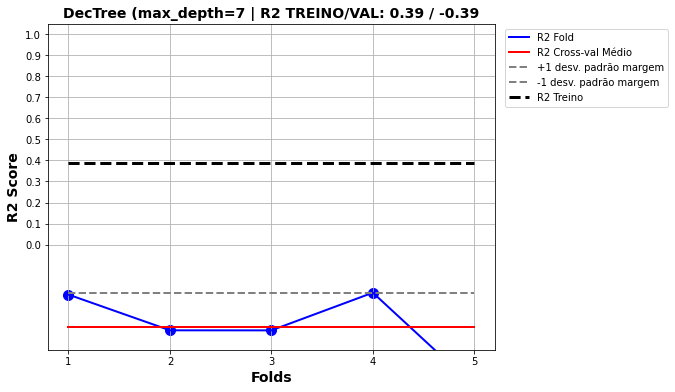

In [28]:
# avaliação dos modelos DecTree

max_profundidades = [1,3,5,7]

for m in max_profundidades:

    cross_val_r2 (DecisionTreeRegressor(max_depth=m),'DecTree (max_depth='+str(m), Xtrain, ytrain, 5, grafico=True)

Dos modelos avaliados, decidimos pelo KNN = 30.
Vamos rodar o teste com este modelo.

In [29]:
modelo_final = KNeighborsRegressor(n_neighbors=30)
modelo_final.fit(Xtrain,ytrain)

KNeighborsRegressor(n_neighbors=30)

In [30]:
preds_final = modelo_final.predict(Xtest)

In [31]:
r2_final = r2_score(y_true = ytest, y_pred = preds_final)

In [32]:
r2_final

0.06802943341713774

Este modelo havia apresentado os resultados para R2 de  0.11 (treino) e 0.03 (validação).
No teste, ficou em 0.06.

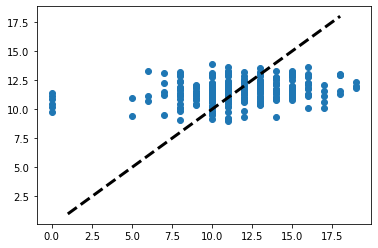

In [33]:
# gráfico comparando os dados reais do teste com os dados preditos pelo modelo

plt.scatter(ytest,preds_final)
range_line = int(np.maximum(max(ytest), max(preds_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()

Nenhum dos modelos adotados apresentou uma métrica de performance significativa.

Na análise exploratória já não foram observadas alterações significativas na variável alvo com relação às demais variáveis.